In [1]:
import numpy as np
from PIL import Image
import glob
import pickle
import matplotlib.pyplot as plt
filelist = glob.glob('/home/maf3r/nnproject/geoguessr/data/new/*.jpg')

In [2]:
x_train = np.array([np.array(Image.open(fname)) for fname in filelist])

In [3]:
print(x_train.shape)

(1560, 200, 400, 3)


In [4]:
pickle.dump(x_train,open("x_train.pickle","wb"))

In [5]:
y = pickle.load(open("/home/maf3r/nnproject/x_train.pickle","rb"))

In [6]:
print(y.shape)

(1560, 200, 400, 3)


In [7]:
x = 0

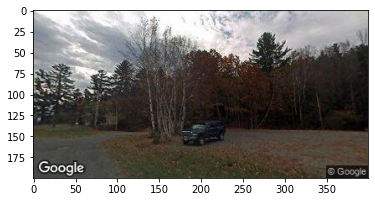

In [8]:
plt.imshow(x_train[x])

In [9]:
y_train = []
for i in range(1560):
    y_train.append(i // 24)
y_train = np.array(y_train)

In [10]:
filelist = glob.glob('/home/maf3r/nnproject/geoguessr/data/testing_data/*.jpg')

In [11]:
x_test = np.array([np.array(Image.open(fname)) for fname in sorted(filelist)])

In [12]:
print(x_test.shape)

(390, 200, 400, 3)


In [13]:
pickle.dump(x_test,open("x_test.pickle","wb"))

In [14]:
y = pickle.load(open("/home/maf3r/nnproject/x_test.pickle","rb"))

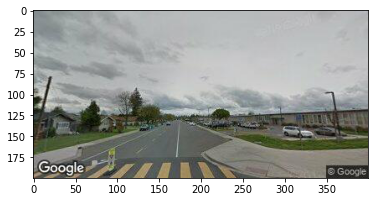

In [15]:
plt.imshow(x_test[x])

In [16]:
y_test = []
for j in range(390):
    y_test.append(j // 6)
y_test = np.array(y_test)

In [17]:
print(y_test)

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15
 16 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23
 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27
 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30 30 30 31 31 31 31 31 31
 32 32 32 32 32 32 33 33 33 33 33 33 34 34 34 34 34 34 35 35 35 35 35 35
 36 36 36 36 36 36 37 37 37 37 37 37 38 38 38 38 38 38 39 39 39 39 39 39
 40 40 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42 43 43 43 43 43 43
 44 44 44 44 44 44 45 45 45 45 45 45 46 46 46 46 46 46 47 47 47 47 47 47
 48 48 48 48 48 48 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 51 51
 52 52 52 52 52 52 53 53 53 53 53 53 54 54 54 54 54

In [21]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from tensorflow.keras import layers

In [23]:
model = keras.Sequential()
model.add(layers.Input(x_train.shape[1:]))
model.add(layers.Conv2D(8, kernel_size=(16,16), activation='relu'))
model.add(layers.Conv2D(16, kernel_size=(32,32), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(16,16)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
# Output Logits (64)
model.add(layers.Dense(len(np.unique(y_train))))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=keras.optimizers.Adam(),
metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 185, 385, 8)       6152      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 154, 354, 16)      131088    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 22, 16)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 22, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3168)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                101408    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [25]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=False)
dg_trainer = data_generator.flow(x_train,y_train,
                                 batch_size=256)

In [26]:
epochs = 1
history = model.fit(dg_trainer,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_train,y_train))

2022-04-30 19:41:40.573847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


7/7 [==============================] - 5206s 728s/step - loss: 19.1395 - sparse_categorical_accuracy: 0.0096 - val_loss: 4.1748 - val_sparse_categorical_accuracy: 0.0154


In [29]:
import tensorflow.keras as tf

tf.models.save_model(model, '/nnproject/geoguessr/model.pickle')

2022-04-30 21:25:14.012801: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/maf3r/nnproject/geoguessr/model.pickle/assets
